In [49]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [50]:
install.packages("usmap")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [51]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [52]:
#install.packages("ggmap", repos='https://cran.r-project.org')
#install.packages("geomapdata", repos='https://cran.r-project.org')
#maps

In [53]:
#library(maps)
#library(geomapdata)
#library(ggmap)

In [54]:
library(usmap)

In [55]:
library(ggplot2)

In [56]:
library(dplyr)

In [57]:
setwd ("/Users/ruyazhang/downloads")

In [58]:
dat1 <- read.csv("Medicare90791.csv")

In [59]:
#To look at below idenfied 5 columns in sum
medicare1 <- dat1[,c("State", "Gender", "Credentials", "City", "ProviderType")]

In [60]:
summary(medicare1, maxsum = 100)

 State     Gender                  Credentials                 City      
 AE:   2   F:11240   LCSW                :3107   NEW YORK        :  179  
 AK:  20   M: 6281   PH.D.               :2657   SAN ANTONIO     :  153  
 AL: 135             PHD                 :1893   BROOKLYN        :  145  
 AR: 205             PSY.D.              :1228   CHICAGO         :  138  
 AZ: 228                                 :1122   LOS ANGELES     :  121  
 CA:1210             PSYD                : 772   SPRINGFIELD     :  115  
 CO: 269             MD                  : 640   HOUSTON         :  114  
 CT: 330             M.D.                : 601   CHARLOTTE       :  112  
 DC:  26             LICSW               : 493   WILMINGTON      :  109  
 DE:  80             MSW                 : 328   INDIANAPOLIS    :  103  
 FL:1293             LMSW                : 317   SAN DIEGO       :  100  
 GA: 353             PH.D                : 252   DALLAS          :   90  
 HI:  30             MSW, LCSW        

In [61]:
#aggregate(dat1$NumberServices, by=list(State=dat1$State), FUN=sum)

In [62]:
#aggregate Number of services in different state from dat1
aggNumServices <- aggregate(NumberServices ~ State, dat1, sum)

In [63]:
#order the aggregation
aggNumServices[order(aggNumServices$NumberServices),]

,State,NumberServices
55,ZZ,20.0
49,VI,28.0
1,AE,158.0
41,PR,208.0
2,AK,413.0
54,WY,1003.0
13,HI,1041.0
44,SD,1412.0
9,DC,1479.0
30,ND,1529.0


In [64]:
#Summary statistic (mean, standard deviation, median, Interquartile Range(25th and 75th percentile), min,max)
summary(aggNumServices)

     State    NumberServices 
 AE     : 1   Min.   :   20  
 AK     : 1   1st Qu.: 2974  
 AL     : 1   Median : 7625  
 AR     : 1   Mean   :13295  
 AZ     : 1   3rd Qu.:17532  
 CA     : 1   Max.   :64246  
 (Other):49                  

In [65]:
#read dataset from CMS for medicare benificiaries
setwd ("/Users/ruyazhang/downloads")

In [66]:
dat2 <- read.csv("StateCountyFFS2017.csv")

In [67]:
# State Total FFS population
stateBeneficiaries <- select(filter(dat2, County == "STATE TOTAL"), c(State, Beneficiaries) )

In [68]:
#print(stateBeneficiaries)

In [69]:
#df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State", all=TRUE, sort=TRUE)

In [70]:
#merge is a function in dplyr package
df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State")

In [71]:
#Culculation NumberServices/Beneficiaries and converted number to  numeric
df$ServicePerFFS <- df[,3]/as.numeric(as.character(df[,2]))

In [72]:
print(df)

   State Beneficiaries NumberServices ServicePerFFS
1     AK      82927.00          413.0  0.0049802839
2     AL     969116.00         7776.0  0.0080238073
3     AR     593592.00         7105.0  0.0119695009
4     AZ    1155335.00         8856.0  0.0076653092
5     CA    5478663.00        64246.0  0.0117265837
6     CO     789379.00         8227.0  0.0104221166
7     CT     604883.00        14685.0  0.0242774222
8     DC      76084.00         1479.0  0.0194390411
9     DE     184883.00         2996.0  0.0162048431
10    FL    4148415.00        59269.0  0.0142871434
11    GA    1544616.00        16984.0  0.0109956131
12    HI     231721.00         1041.0  0.0044924715
13    IA     577446.00         6213.0  0.0107594476
14    ID     294633.00         3321.0  0.0112716498
15    IL    2007176.00        33424.0  0.0166522517
16    IN    1160602.00        20420.0  0.0175943174
17    KS     485625.00         6730.0  0.0138584299
18    KY     857387.00         8050.0  0.0093889924
19    LA    

In [73]:
dim(df)
str(df)

[1] 53  4

'data.frame':	53 obs. of  4 variables:
 $ State         : Factor w/ 56 levels "AK","AL","AR",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Beneficiaries : Factor w/ 2898 levels "*","10009.00",..: 2633 2854 2204 166 2093 2560 2234 2508 736 1723 ...
 $ NumberServices: num  413 7776 7105 8856 64246 ...
 $ ServicePerFFS : num  0.00498 0.00802 0.01197 0.00767 0.01173 ...


In [74]:
#Below is the old way of culculation
#numera <- df[,3]
#denom <- as.numeric(as.character(df[,2]))
#Rate=numera/denom*1000
#print(Rate)
#df$Rate <- numera/denom*1000
#df$Rate <- as.character(df$Rate )
#df$Rate <- as.numeric(gsub(',', '', df$Rate ))

In [75]:
#Always check the culculation see if it is correct
print(df)

   State Beneficiaries NumberServices ServicePerFFS
1     AK      82927.00          413.0  0.0049802839
2     AL     969116.00         7776.0  0.0080238073
3     AR     593592.00         7105.0  0.0119695009
4     AZ    1155335.00         8856.0  0.0076653092
5     CA    5478663.00        64246.0  0.0117265837
6     CO     789379.00         8227.0  0.0104221166
7     CT     604883.00        14685.0  0.0242774222
8     DC      76084.00         1479.0  0.0194390411
9     DE     184883.00         2996.0  0.0162048431
10    FL    4148415.00        59269.0  0.0142871434
11    GA    1544616.00        16984.0  0.0109956131
12    HI     231721.00         1041.0  0.0044924715
13    IA     577446.00         6213.0  0.0107594476
14    ID     294633.00         3321.0  0.0112716498
15    IL    2007176.00        33424.0  0.0166522517
16    IN    1160602.00        20420.0  0.0175943174
17    KS     485625.00         6730.0  0.0138584299
18    KY     857387.00         8050.0  0.0093889924
19    LA    

In [ ]:
#delete DC, PR, VI states (this was when using ggmap, but now we use US map)
#df <- df[-c(8, 40, 48),]
#ggmap previous procedures: 
#states <- map_data("state")
#dim(states): 15537 6 
#head(states)
#ggplot(data = states) + geom_polygon(aes(x = long, y = lat, fill = region, group = group), color = "white") + coord_fixed(1.3) + guides(fill=FALSE) 

#Match state name file (from abbreviation to full, to below formula(50states) thus deleted 3 states above)
#states <- setNames(as.list(datasets::state.name), datasets::state.abb)
#states[["AL"]]     : 'Alabama'
#dput(states)

#df$State <- setNames(as.list(datasets::state.name), datasets::state.abb)
#df$State <- tolower(df$State)
#print(df)

#merge state long and lat from ggplot to my dataset by region in ggplot and State in my dataset
#data <- merge(states, df, by.x='region', by.y='State')
#head(data)

#converted beneficiaries to numeric so that I can lable it in log10
#data$Beneficiaries <- as.numeric(as.character(data$Beneficiaries))

#mapping:
#ggplot(data, aes(x=long, y=lat, group=group, fill=Rate)) + 
#geom_polygon(color='gray') + coord_fixed(1.6) + scale_fill_gradient(low='white',
#  high='red', trans = "log10") +
#theme_void() + ggtitle('Rate of Telemedicine use per 1000 beneficiaries - HCPCS code 90791')

In [ ]:
#write.csv(df, "state.csv")

In [ ]:
setwd("/Users/ruyazhang/downloads")

In [ ]:
df <- read.csv("state.csv")

In [ ]:
df <- df[,-1]

In [77]:
names(df) <- c("abbr","FFSpop","Service","ServicePerFFS")

In [78]:
df <- merge(statepop, df, by="abbr")

In [79]:
df$ServicePerFFS <- df$ServicePerFFS *1000

In [29]:
dput(head(df))

structure(list(abbr = c("AK", "AL", "AR", "AZ", "CA", "CO"), 
    fips = c("02", "01", "05", "04", "06", "08"), full = c("Alaska", 
    "Alabama", "Arkansas", "Arizona", "California", "Colorado"
    ), pop_2015 = c(738432, 4858979, 2978204, 6828065, 39144818, 
    5456574), FFSpop = c(82927, 969116, 593592, 1155335, 5478663, 
    789379), Service = c(413, 7776, 7105, 8856, 64246, 8227), 
    ServicePerFFS = c(4980.28386412146, 8023.80726352676, 11969.5009366703, 
    7665.30919603405, 11726.5836573631, 10422.116625854)), row.names = c(NA, 
6L), class = "data.frame")


Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

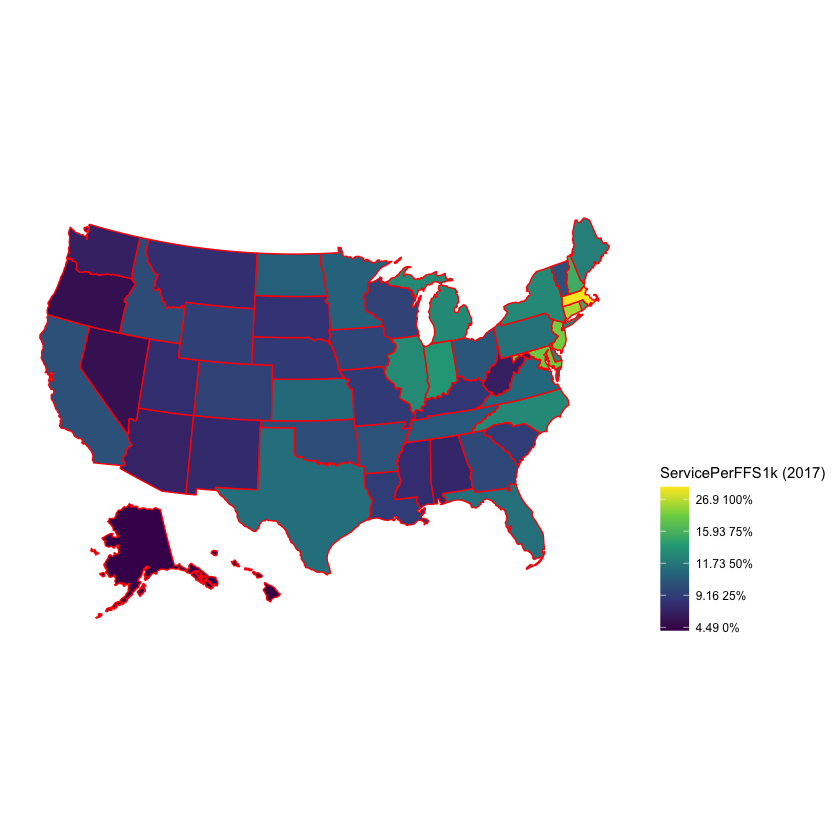

In [89]:
plot_usmap(data = df, values = "ServicePerFFS", color = "red") + 
  scale_fill_continuous(name = "ServicePerFFS1k (2017)", 
                        type = "viridis", 
                        labels = paste(round(quantile(df$ServicePerFFS),2),
                                       names(quantile(df$ServicePerFFS)), "")) + 
  theme(legend.position = "right") 


In [81]:
#Aggregate unique NPI in different states
setwd ("/Users/ruyazhang/downloads")

In [82]:
dat1 <- read.csv("Medicare90791.csv")

In [83]:
UniqueNPI <- summarize(group_by(dat1, State), unique_NPI = n_distinct(NPI))

`summarise()` ungrouping output (override with `.groups` argument)


In [84]:
names(UniqueNPI) <- c("abbr","NumberOfProvider")

In [85]:
df <- merge(df, UniqueNPI, by="abbr")

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

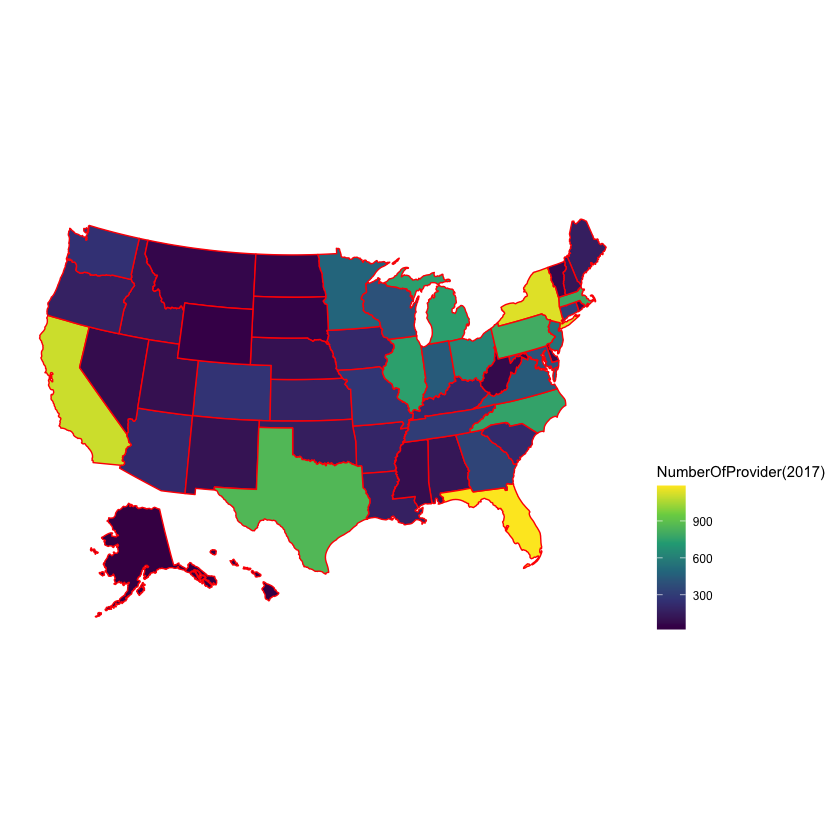

In [86]:
plot_usmap(data = df, values = "NumberOfProvider", color = "red") + 
  scale_fill_continuous(name = "NumberOfProvider(2017)", type = "viridis", label = scales::comma) + 
  theme(legend.position = "right")

In [87]:
df$ProviderPerFFS <- df[,8]/as.numeric(as.character(df[,5]))
df$ProviderPerFFS <- df$ProviderPerFFS *10000

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

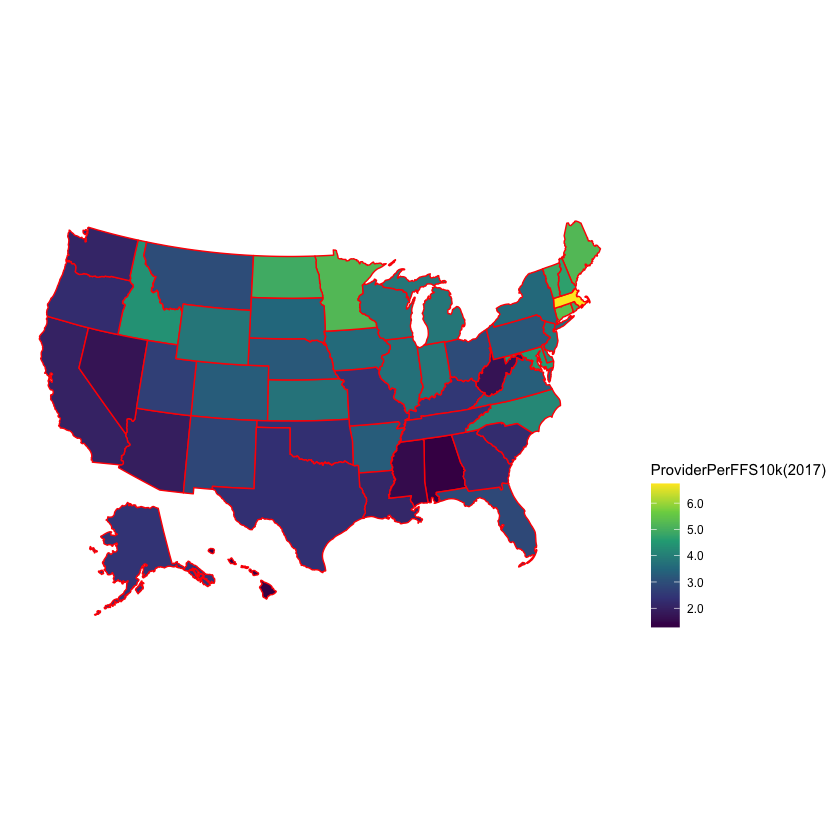

In [88]:
plot_usmap(data = df, values = "ProviderPerFFS", color = "red") + 
  scale_fill_continuous(name = "ProviderPerFFS10k(2017)", type = "viridis", label = scales::comma) + 
  theme(legend.position = "right")